# SRCAF 
This experiment is based on the SRCAF framework and implements a visual analysis of semantic understanding differences among multiple roles using Python and Jupyter Notebook

In [1]:
!pip install nltk scikit-learn matplotlib seaborn

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skybl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skybl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:

narratives = {
    'User': "I only want my health data used temporarily. Please don't share it with others. I care about privacy.",
    'Platform': "We may store the data to improve our AI algorithms. Data might be used for analytics or shared with partners.",
    'Regulator': "All data sharing must follow consent standards, be purpose-limited, and be clearly explained."
}

In [4]:

stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(narratives.values())
keywords = {role: set(vectorizer.inverse_transform(X[i])[0]) for i, role in enumerate(narratives)}

In [5]:

def jaccard(set1, set2):
    return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0.0

roles = list(keywords.keys())
matrix = pd.DataFrame(index=roles, columns=roles)
for r1 in roles:
    for r2 in roles:
        matrix.loc[r1, r2] = jaccard(keywords[r1], keywords[r2]) if r1 != r2 else 1.0
matrix = matrix.astype(float)

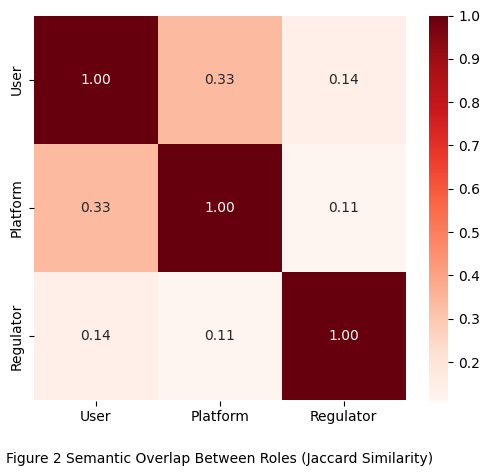

In [7]:

plt.figure(figsize=(6,5))
sns.heatmap(matrix, annot=True, cmap="Reds", fmt=".2f")
plt.xlabel("Figure 2 Semantic Overlap Between Roles (Jaccard Similarity)", labelpad=20)
plt.show()

In [8]:
# 输出关键词表
for role, kw in keywords.items():
    print(f"{role} Keywords: {sorted(kw)}")

User Keywords: [np.str_('care'), np.str_('data'), np.str_('used')]
Platform Keywords: [np.str_('ai'), np.str_('algorithms'), np.str_('analytics'), np.str_('data'), np.str_('used')]
Regulator Keywords: [np.str_('clearly'), np.str_('consent'), np.str_('data'), np.str_('explained'), np.str_('follow')]
